# Topics in Artificial Intelligence
# Assignment 1: Intriduction to Deep Learning


In Section 1 of the notebook, we have implemented a single-layer supervised neural network for you, so no coding is necessary for this section. Sections 2 and 3 are where your coding expertise is needed, and you'll also be expected to answer specific questions. Section 4 is crafted to familiarize you with PyTorch. Beyond that, its primary purpose is to equip you with essential debugging strategies for training neural networks.

# Single-layer neural network
This section provides simple implementation of the single-layer supervised neural network that has 4 inputs and 3 outputs. First, let's review the skeleton of a single linear layer neural network. The inputs of the network are the variables $x_1, x_2, x_3, x_4$, or the input vector $\mathbf{x}=[x_1, x_2, x_3, x_4]$, the outputs of the network are $\widehat{y}_1,\widehat{y}_2,\widehat{y}_3$, or the output vector $\widehat{\mathbf{y}}=[$$\widehat{y}$$_1,\widehat{y}_2,\widehat{y}_3]$:

<br>
<center>
<img src="./images/1_layer_net.png" width="450">
</center>
<br>

The given $j$-th output $\widehat{y}_j$ of this single linear layer + activation function is computed as follows:

$$\widehat{y}_j= \text{sigmoid}(w_{1j}x_1 + w_{2j}x_2 + w_{3j}x_3 + w_{4j}x_4 + b_j) = \text{sigmoid}\Big(\sum_{i=1}^{i=4}w_{ij}x_{i} + b_j\Big)$$

In matrix notation, this would be:

\begin{equation}
\begin{bmatrix}
  \widehat{y}_{1} \\
  \widehat{y}_{2} \\
  \widehat{y}_{3}
\end{bmatrix}^T=\mathbf{Sigmoid}\Bigg(
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  x_{4}
\end{bmatrix}^T
\begin{bmatrix}
  w_{1,1} & w_{1,2} & w_{1,3}\\
  w_{2,1} & w_{3,2} & w_{2,3}\\
  w_{3,1} & w_{3,2} & w_{3,3}\\
  w_{4,1} & w_{4,2} & w_{4,3}
\end{bmatrix}
+
\begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}
\end{bmatrix}^T\Bigg)
\end{equation}

or more compactly:

\begin{equation}
\widehat{\mathbf{y}}^T = \mathbf{Sigmoid}(\mathbf{x}^T \cdot \mathbf{W} + \mathbf{b}^T)
\end{equation}

The element-wise sigmoid function is: $\mathbf{Sigmoid}(\mathbf{x}) = 1 \;/\; (1 + exp(-\mathbf{x}))$, or alternatively: $\mathbf{Sigmoid}(\mathbf{x}) = exp(\mathbf{x})\;/\;(1 + exp(\mathbf{x}))$. Here the sigmoid is separated logically into an activation layer $\sigma(x)$ and a linear layer $\text{linear}(3,4)$ as illustrated in figure.

Training these weights $\mathbf{W}$ and biases $\mathbf{b}$ requires having many training pairs $(\widehat{\mathbf{y}}^{(m)}, \mathbf{x}^{(m)})$. The inputs $\mathbf{x}$ can be the pixels of an image, indices of words, the entries in a database, and the outputs $\widehat{\mathbf{y}}$ can also be literally anything, including a number indicating a category, a set of numbers indicating the indices of words composing a sentence, an output image itself, etc.

## Forward-propagation

Computing the outputs $\widehat{\mathbf{y}}$ from the inputs $\mathbf{x}$ in this network composed of a single linear layer, and a sigmoid layer, is called forward-propagation. Below is the code that implements these two operations:

In [ ]:
import numpy as np
import numpy.matlib

class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.001
        self.bias = np.matlib.randn((1, output_dim)) * 0.001

    # y = Wx + b
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias

    def getParameters(self):
        return [self.weight, self.bias]

# Let's test the composition of the two functions (forward-propagation in the neural network).
x1 = np.array([[1, 2, 2, 3]])
y_hat1 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x1))
print('x[1] = '+ str(x1))
print('y_hat[1] = ' + str(y_hat1) + '\n')

# Let's test the composition of the two functions (forward-propagation in the neural network).
x2 = np.array([[4, 5, 2, 1]])
y_hat2 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x2))
print('x[2] = '+ str(x2))
print('y_hat[2] = ' + str(y_hat2) + '\n')

# We can also compute both at once, which could be more efficient since it requires a single matrix multiplication.
x = np.concatenate((x1, x2), axis = 0)
y_hat = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x))
print('x = ' + str(x))
print('y_hat = ' + str(y_hat))

x[1] = [[1 2 2 3]]
y_hat[1] = [[0.50094783 0.50050695 0.49942079]]

x[2] = [[4 5 2 1]]
y_hat[2] = [[0.50011016 0.50102926 0.49987319]]

x = [[1 2 2 3]
 [4 5 2 1]]
y_hat = [[0.50056772 0.50091482 0.50130395]
 [0.50039931 0.50048285 0.50162523]]


## Loss functions.

After computing the output predictions $\widehat{\mathbf{y}}$ it is necessary to compare these against the true values of $\mathbf{y}$. Let's call these true, correct, or desired values $\mathbf{y}$. Typically, a simple loss or cost function is used to measure the degree by which the prediction $\widehat{\mathbf{y}}$ is wrong with respect to $\mathbf{y}$. A common loss function for regression is the sum of squared differences between the prediction and its true value. Assuming a prediction $\widehat{\mathbf{y}}^{(d)}$ for our training sample $\mathbf{x}^{(d)}$ with true value $\mathbf{y}^{(d)}$, then the loss can be computed as:

$$loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)}) = (\widehat{y}^{(d)}_1 - y^{(d)}_1)^2 + (\widehat{y}^{(d)}_2 - y^{(d)}_2)^2 + (\widehat{y}^{(d)}_3 - y^{(d)}_3)^2 = \sum_{j=1}^{j=3}(\widehat{y}^{(d)}_j - y^{(d)}_j)^2$$

The goal is to modify the parameters [$\mathbf{W}, \mathbf{b}$] in the Linear layer so that the value of $loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$ becomes as small as possible for all training samples in a set $D=\{(\mathbf{x}^{(d)},\mathbf{y}^{(d)})\}$. This would in turn ensure that predictions $\widehat{\mathbf{y}}$ are as similar as possible to the true values $\mathbf{y}$. To achieve this we need to minimize the following function:

$$\mathcal{L}(\mathbf{W}, \mathbf{b}) = \sum_{d=1}^{d=|D|} loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$$

The only two variables for our model in the function $\mathcal{L}(\mathbf{W}, \mathbf{b})$ are $\mathbf{W}$ and $\mathbf{b}$, this is because the training dataset $D$ is fixed. Finding the values of $\mathbf{W}$ and $\mathbf{b}$ that minimize the the loss, particularly for complex functions, is typically done using gradient based optimization, like Stochastic Gradient Descent (SGD).

In [ ]:
class nn_MSECriterion:  # MSE = mean squared error.
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

# Let's test the loss function.
y_hat = np.array([[0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33]])
y_true = np.array([[0.25, 0.25, 0.25], [0.33, 0.33, 0.33], [0.77, 0.77, 0.77], [0.80, 0.80, 0.80]])

nn_MSECriterion().forward(y_hat, y_true)

1.6271000000000002


## Backward-propagation (Backpropagation)

Backpropagation is just applying the chain-rule in calculus to compute the derivative of a function which is the composition of many functions (this is essentially definition of the neural network).

Below is the implementation of required derivative computations for our simple network. You are highly advised to derive the derivatives implemented here to make sure you understand how one arrives at them.

In [ ]:
# This is referred above as f(u).
class nn_MSECriterion:
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

    def backward(self, predictions, labels):
        num_samples = labels.shape[0]
        return 2 * (predictions - labels)

# This is referred above as g(v).
class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

    def backward(self, x, gradOutput):
        # It is usually a good idea to use gv from the forward pass and not recompute it again here.
        gv = 1 / (1 + np.exp(-x))
        return np.multiply(np.multiply(gv, (1 - gv)), gradOutput)

# This is referred above as h(W, b)
class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.01
        self.bias = np.matlib.randn((1, output_dim)) * 0.01
        self.gradWeight = np.zeros_like(self.weight)
        self.gradBias = np.zeros_like(self.bias)

    def forward(self, x):
        return np.dot(x, self.weight) + self.bias

    def backward(self, x, gradOutput):
        # dL/dw = dh/dw * dL/dv
        self.gradWeight = np.dot(x.T, gradOutput)
        # dL/db = dh/db * dL/dv
        self.gradBias = np.copy(gradOutput)
        # return dL/dx = dh/dx * dL/dv
        return np.dot(gradOutput, self.weight.T)

    def getParameters(self):
        params = [self.weight, self.bias]
        gradParams = [self.gradWeight, self.gradBias]
        return params, gradParams


# Let's test some dummy inputs for a full pass of forward and backward propagation.
x1 = np.array([[1, 2, 2, 3]])
y1 = np.array([[0.25, 0.25, 0.25]])

# Define the operations.
linear = nn_Linear(4, 3)  # h(W, b)
sigmoid = nn_Sigmoid()  # g(v)
loss = nn_MSECriterion()  # f(u)

# Forward-propagation.
lin = linear.forward(x1)
y_hat = sigmoid.forward(lin)
loss_val = loss.forward(y_hat, y1) # Loss function.

# Backward-propagation.
dy_hat = loss.backward(y_hat, y1)
dlin = sigmoid.backward(lin, dy_hat)
dx1 = linear.backward(x1, dlin)

print('\n num_samples = ' + str(y1.shape[0]))

# Show parameters of the linear layer.
print('\nW = ' + str(linear.weight))
print('B = ' + str(linear.bias))

# Show the intermediate outputs in the forward pass.
print('\nx1    = '+ str(x1))
print('lin   = ' + str(lin))
print('y_hat = ' + str(y_hat))

print('\nloss = ' + str(loss_val))

# Show the intermediate gradients with respect to inputs in the backward pass.
print('\ndy_hat = ' + str(dy_hat))
print('dlin   = ' + str(dlin))
print('dx1    = ' + str(dx1))

# Show the gradients with respect to parameters.
print('\ndW = ' + str(linear.gradWeight))
print('dB = ' + str(linear.gradBias))


 num_samples = 1

W = [[ 0.02293718 -0.00830011 -0.0101952 ]
 [-0.00214654  0.01021248  0.0052475 ]
 [-0.00477124 -0.0003599   0.01037039]
 [ 0.0067262   0.02428877  0.01005687]]
B = [[ 0.00353567  0.00614726 -0.00348984]]

x1    = [[1 2 2 3]]
lin   = [[0.03281588 0.09041862 0.04772135]]
y_hat = [[0.50820323 0.52258927 0.51192807]]

loss = 0.20958013446857973

dy_hat = [[0.51640647 0.54517853 0.52385615]]
dlin   = [[0.12906687 0.13601644 0.1308895 ]]
dx1    = [[0.00049703 0.00179886 0.00069261 0.00548814]]

dW = [[0.12906687 0.13601644 0.1308895 ]
 [0.25813373 0.27203289 0.26177901]
 [0.25813373 0.27203289 0.26177901]
 [0.3872006  0.40804933 0.39266851]]
dB = [[0.12906687 0.13601644 0.1308895 ]]


## Gradient checking

The gradients can also be computed with numerical approximation using the definition of derivatives. Let a single input pair $(\mathbf{x}, \mathbf{y})$ be the input, for each entry $w_{ij}$ in the weight matrix $\mathbf{W}$, the partial derivatives can be computed as follows:

$$\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}} = \frac{\mathcal{L}(\mathbf{W} + \mathbf{E}_{ij},b) - \mathcal{L}(\mathbf{W} - \mathbf{E}_{ij}, b)}{2\epsilon}, $$

where $\mathbf{E}_{ij}$ is a matrix that has $\epsilon$ in its $(i,j)$ entry and zeros everywhere else. Intuitively this gradient tells how would the value of the loss changes if we change a particular weight $w_{ij}$ by an $\epsilon$ amount. We can do the same to compute derivatives with respect to the bias parameters $b_i$. Below is the code that checks for a given input $(\mathbf{x}, \mathbf{y})$, the gradients for the matrix $\mathbf{W}$.

In [ ]:
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
linear = nn_Linear(4, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = linear.forward(x)
a1 = sigmoid.forward(a0)
loss = criterion.forward(a1, y) # Loss function.

# Backward-propagation.
da1 = criterion.backward(a1, y)
da0 = sigmoid.backward(a0, da1)
dx = linear.backward(x, da0)

gradWeight = linear.gradWeight
gradBias = linear.gradBias

approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear.forward(x)), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(x)), y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight))
print('\napproxGradWeight: ' + str(approxGradWeight))

gradWeight: [[ -3.14696567  -4.33787276  -5.59340283]
 [ -5.11045707  -7.04440876  -9.08330373]
 [-46.31687935 -63.84458884 -82.32341595]
 [ -7.16808847  -9.88071018 -12.74052866]]

approxGradWeight: [[ -3.14692458  -4.33784738  -5.593349  ]
 [ -5.11034867  -7.04434179  -9.08316175]
 [-46.30793529 -63.83903151 -82.31168158]
 [ -7.16787516  -9.88057836 -12.74024923]]


## Stochastic Gradient Descent.

The code below creates a dummy dataset that will be used for training. The inputs are 1000 vectors of size 4, and the outputs are 1000 vectors of size 3. The focus here is on training, however, in a real task one would check accuracy of the model on test (unseen) data.

In [ ]:
dataset_size = 1000

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis = 1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

print(x.shape)
print(y.shape)

(1000, 4)
(1000, 3)


To learn the parameters efficiently we will implement the stochastic gradient descent loop that moves the weights according to the gradients. In each iteration we sample an $(\mathbf{x}, \mathbf{y})$ pair and compute the gradients of the parameters, then we update the parameters according to the following gradient descent rules:

$$w_{ij} = w_{ij} - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}}$$

$$b_i = b_i - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial b_i}$$

where $\lambda$ is the learning rate.

In [ ]:
learningRate = 0.1

model = {}
model['linear'] = nn_Linear(4, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)

        # Backward.
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear'].backward(xi, da0)

        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.47292057
epoch[10] = 1.41799062
epoch[20] = 1.40611271
epoch[30] = 1.40164579
epoch[40] = 1.39867343
epoch[50] = 1.39653278
epoch[60] = 1.39507777
epoch[70] = 1.39403791
epoch[80] = 1.39324397
epoch[90] = 1.39261415
epoch[100] = 1.39210131
epoch[110] = 1.39167521
epoch[120] = 1.39131539
epoch[130] = 1.39100749
epoch[140] = 1.39074107
epoch[150] = 1.39050836
epoch[160] = 1.39030340
epoch[170] = 1.39012154
epoch[180] = 1.38995911
epoch[190] = 1.38981316
epoch[200] = 1.38968132
epoch[210] = 1.38956162
epoch[220] = 1.38945247
epoch[230] = 1.38935252
epoch[240] = 1.38926067
epoch[250] = 1.38917597
epoch[260] = 1.38909762
epoch[270] = 1.38902495
epoch[280] = 1.38895736
epoch[290] = 1.38889436
epoch[300] = 1.38883551
epoch[310] = 1.38878042
epoch[320] = 1.38872875
epoch[330] = 1.38868021
epoch[340] = 1.38863453
epoch[350] = 1.38859149
epoch[360] = 1.38855085
epoch[370] = 1.38851245
epoch[380] = 1.38847611
epoch[390] = 1.38844167


# Two-layer neural network with 1-hidden layer.
In the previous section, we constructed a single-layer neural network that accepted input vectors of size 4 and produced output vectors of size 3. In this section, your challenge is to adapt the code to train a two-layer network, which includes one hidden layer with a size determined by hidden_state_size. Please note that hidden_state_size is a variable parameter that you should be able to adjust.

<br>
<center>
<img src="images/2_layer_net.png" width="450">
</center>
<br>


## Implementing the network and SGD learning.
Please modify the code of Section "Stochastic Gradient Descent" to implement a two-layer network and the SGD training procedure for it.


In [ ]:
hidden_state_size = 5;

# Your code goes here.
# Parameters
dataset_size = 1000
learning_rate = 0.1
hidden_state_size = 5

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis=1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

# Initialize the model
model = {}
model['linear1'] = nn_Linear(4, hidden_state_size)
model['sigmoid'] = nn_Sigmoid()
model['linear2'] = nn_Linear(hidden_state_size, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

# Training loop
for epoch in range(400):
    loss = 0
    for i in range(dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward pass
        a0 = model['linear1'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        a2 = model['linear2'].forward(a1)
        a3 = model['sigmoid'].forward(a2)

        loss += model['loss'].forward(a3, yi)

        # Backward pass
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid'].backward(a2, da3)
        da1 = model['linear2'].backward(a1, da2)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear1'].backward(xi, da0)

        # Update weights and biases
        model['linear1'].weight -= learning_rate * model['linear1'].gradWeight
        model['linear1'].bias -= learning_rate * model['linear1'].gradBias
        model['linear2'].weight -= learning_rate * model['linear2'].gradWeight
        model['linear2'].bias -= learning_rate * model['linear2'].gradBias

    if epoch % 10 == 0:
        print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.52107530
epoch[10] = 1.44491173
epoch[20] = 1.42437114
epoch[30] = 1.42007751
epoch[40] = 1.41924688
epoch[50] = 1.41881240
epoch[60] = 1.41828572
epoch[70] = 1.41777388
epoch[80] = 1.41734556
epoch[90] = 1.41692986
epoch[100] = 1.41641305
epoch[110] = 1.41365953
epoch[120] = 1.40051396
epoch[130] = 1.38803836
epoch[140] = 1.38160854
epoch[150] = 1.37114877
epoch[160] = 1.34974611
epoch[170] = 1.31788586
epoch[180] = 1.29211829
epoch[190] = 1.28268413
epoch[200] = 1.27927220
epoch[210] = 1.27771450
epoch[220] = 1.27684230
epoch[230] = 1.27630259
epoch[240] = 1.27592284
epoch[250] = 1.27562875
epoch[260] = 1.27538784
epoch[270] = 1.27518354
epoch[280] = 1.27500609
epoch[290] = 1.27484905
epoch[300] = 1.27470800
epoch[310] = 1.27457980
epoch[320] = 1.27446223
epoch[330] = 1.27435366
epoch[340] = 1.27425289
epoch[350] = 1.27415901
epoch[360] = 1.27407129
epoch[370] = 1.27398916
epoch[380] = 1.27391209
epoch[390] = 1.27383967


## Gradient checking.
Check the gradients of the above network for both linear layer parameters $W_1$ and $W_2$ using some sample input pair ($\mathbf{x}$, $\mathbf{y}$). You will likely want to look and model this after Section "Gradient checking" above.

In [ ]:
# Your code goes here.
# Sample input and target
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
hidden_state_size = 5
linear1 = nn_Linear(4, hidden_state_size)
linear2 = nn_Linear(hidden_state_size, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = linear1.forward(x)
a1 = sigmoid.forward(a0)
a2 = linear2.forward(a1)
a3 = sigmoid.forward(a2)
loss = criterion.forward(a3, y) # Loss function.

# Backward-propagation.
da3 = criterion.backward(a3, y)
da2 = sigmoid.backward(a2, da3)
da1 = linear2.backward(a1, da2)
da0 = sigmoid.backward(a0, da1)
dx = linear1.backward(x, da0)

# Gradients
gradWeight1 = linear1.gradWeight
gradBias1 = linear1.gradBias
gradWeight2 = linear2.gradWeight
gradBias2 = linear2.gradBias

# Gradient checking for gradWeight1
epsilon = 0.0001
approxGradWeight1 = np.zeros_like(linear1.weight)


# Verify gradWeight1
for i in range(linear1.weight.shape[0]):
    for j in range(linear1.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear2.forward(linear1.forward(x))), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight1 = np.copy(linear1.weight)
        shifted_weight1[i, j] = shifted_weight1[i, j] + epsilon
        shifted_linear1 = nn_Linear(4, 5)
        shifted_linear1.bias = linear1.bias
        shifted_linear1.weight = shifted_weight1
        fw_epsilon = criterion.forward(sigmoid.forward(linear2.forward(shifted_linear1.forward(x))), y) # Loss function.
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight1[i, j] = (fw_epsilon - fw) / epsilon

# Gradient checking for gradWeight2
approxGradWeight2 = np.zeros_like(linear2.weight)

# Verify gradWeight2
for i in range(linear2.weight.shape[0]):
    for j in range(linear2.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear2.forward(linear1.forward(x))), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight2 = np.copy(linear2.weight)
        shifted_weight2[i, j] = shifted_weight2[i, j] + epsilon
        shifted_linear2 = nn_Linear(5, 3)
        shifted_linear2.bias = linear2.bias
        shifted_linear2.weight = shifted_weight2
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear2.forward(linear1.forward(x))), y) # Loss function.
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight2[i, j] = (fw_epsilon - fw) / epsilon

# Print gradients for comparison
print('gradWeight1:\n', gradWeight1)
print('\napproxGradWeight1:\n', approxGradWeight1)

print('\ngradWeight2:\n', gradWeight2)
print('\napproxGradWeight2:\n', approxGradWeight2)


gradWeight1:
 [[-6.81834139e-03  3.25175225e-02 -6.17228157e-03  2.10997271e-02
   1.25849100e-04]
 [-1.10725202e-02  5.28062331e-02 -1.00233632e-02  3.42645142e-02
   2.04370334e-04]
 [-1.00351999e-01  4.78591228e-01 -9.08433236e-02  3.10544702e-01
   1.85224060e-03]
 [-1.55306665e-02  7.40676901e-02 -1.40590858e-02  4.80604896e-02
   2.86656284e-04]]

approxGradWeight1:
 [[-2.73330846e-02  1.30604376e-01 -2.47145233e-02  9.29096146e-02
   4.86167266e-04]
 [-4.43870509e-02  2.12092596e-01 -4.01346951e-02  1.50878873e-01
   7.89507340e-04]
 [-4.02285006e-01  1.92223242e+00 -3.63746876e-01  1.36744138e+00
   7.15635792e-03]
 [-6.22586650e-02  2.97487802e-01 -5.62941892e-02  2.11627490e-01
   1.10739506e-03]]

gradWeight2:
 [[-0.6907425  -0.94731439 -1.22925559]
 [-0.62823957 -0.86159514 -1.11802445]
 [-0.69505839 -0.95323338 -1.23693621]
 [-0.87831446 -1.20455875 -1.56306143]
 [-0.72843159 -0.99900284 -1.29632765]]

approxGradWeight2:
 [[-0.06510267 -0.08930058 -0.11574601]
 [ 0.1852518

## Activation functions.

As was covered in class, there are other activation functions that can be used instead of sigmoid. Implement below the forward and backward operation for two popular activation functions.

$$\text{ReLU}(\mathbf{x}) = \text{max}(0, \mathbf{x})$$

$$\text{Tanh($\mathbf{x}$)} = \text{tanh}(\mathbf{x}) = \frac{e^{\mathbf{x}} - e^{-\mathbf{x}}}{e^{\mathbf{x}} + e^{-\mathbf{x}}}$$

Note, that in the above activations are applied element-wise on the input vector $\mathbf{x}$.

In [ ]:
class nn_ReLU:
    def forward(self, x):
        # Forward pass.
        return np.maximum(0, x)

    def backward(self, x, grad_output):
        # Backward pass
        grad_output[x < 0] = 0
        return grad_output

class nn_Tanh:
    def forward(self, x):
        # Forward pass.
        return np.tanh(x)

    def backward(self, x, grad_output):
        # Backward pass
        return grad_output * (1 - np.tanh(x)**2)


## Loss functions.

As discussed in class, there are other loss functions that can be used instead of a mean squared error. Implement the forward and backward operations for the following very common loss function where $\widehat{\mathbf{y}}$ is a vector of predicted values, and $\mathbf{y}$ is the vector with ground-truth labels. Assume both vectors are of size $n$.

$$\text{BinaryCrossEntropy}(\mathbf{y}, \widehat{\mathbf{y}}) = - \frac{1}{n}\sum_{i=1}^{i=n} [y_i\text{log}(\widehat{y}_i) + (1 - y_i)\text{log}(1 - \widehat{y}_i)]$$,

The binary cross entropy loss assumes that the vector $\mathbf{y}$ only has values that are either 0 and 1, and the prediction vector $\widehat{\mathbf{y}}$ contains values between 0 and 1 (e.g. the output of a $\text{sigmoid}$ layer).

In [ ]:
class nn_BCECriterion:
    def forward(self, predictions, labels):
        # Forward pass.
        epsilon = 1e-15  # Small value to avoid log(0)
        predictions = np.clip(predictions, epsilon, 1 - epsilon)  # Clip predictions to avoid log(0)
        loss = - (labels * np.log(predictions) + (1 - labels) * np.log(1 - predictions))
        return np.mean(loss)

    def backward(self, predictions, labels):
        # Backward pass.
        epsilon = 1e-15  # Small value to avoid division by zero
        predictions = np.clip(predictions, epsilon, 1 - epsilon)  # Clip predictions to avoid division by zero
        grad_output = - (labels / predictions) + ((1 - labels) / (1 - predictions))
        return grad_output / len(labels)  # Normalize by the number of samples


<b>Optional</b>: Most deep learning libraries support batches, meaning you can forward, and backward a set of inputs. So far the code supports batches in the forward pass. However, the backward pass does not support batches. Modify the code in backward function of the nn_Linear class to support batches. Then test the implementation by training the network in Section 2.1 using a batch size of 32. <span style="color:#666">(Keep in mind that the gradWeight and gradBias vectors should accumulate the gradients of each sample in the batch. This is because the gradient of the loss with respect to the batch is the sum of the gradients with respect to each sample in the batch. This means that for a batch of size 32, the sum will be over the 32 samples).</span>

# Behaviour of neural networks.

Prior to this section, all experiments were done in a dummy dataset where it is difficult to see how neural networks behave on more realistic data. In this section the goal is to get a feel for how newural networks behave and what effect hidden statest may play. Below is the code that generates and visualizes a classification dataset of 400 samples.

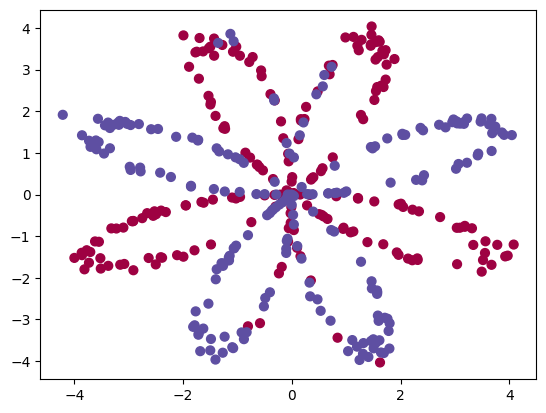

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.datasets

def load_planar_dataset():
    np.random.seed(1)
    m = 400                # number of examples
    N = int(m/2)           # number of points per class
    D = 2                  # dimensionality
    X = np.zeros((m,D))    # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4                  # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

# Load the data
X, Y = load_planar_dataset();

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## Two-layer neural network with 1-hidden layer of size = 1.

Reimplement the network from Section "Implementing the network and SGD learning" here, train it and then display the results.

epoch[0] = 0.09724545
epoch[10] = 0.09933885
epoch[20] = 0.09929896
epoch[30] = 0.09907156
epoch[40] = 0.09848320
epoch[50] = 0.09778368
epoch[60] = 0.09684818
epoch[70] = 0.09539672
epoch[80] = 0.09405329
epoch[90] = 0.09311169
epoch[100] = 0.09249286
epoch[110] = 0.09207015
epoch[120] = 0.09176131
epoch[130] = 0.09152161
epoch[140] = 0.09132710
epoch[150] = 0.09116435
epoch[160] = 0.09102518
epoch[170] = 0.09090424
epoch[180] = 0.09079781
epoch[190] = 0.09070317
epoch[200] = 0.09061828
epoch[210] = 0.09054154
epoch[220] = 0.09047170
epoch[230] = 0.09040776
epoch[240] = 0.09034890
epoch[250] = 0.09029447
epoch[260] = 0.09024391
epoch[270] = 0.09019675
epoch[280] = 0.09015263
epoch[290] = 0.09011119


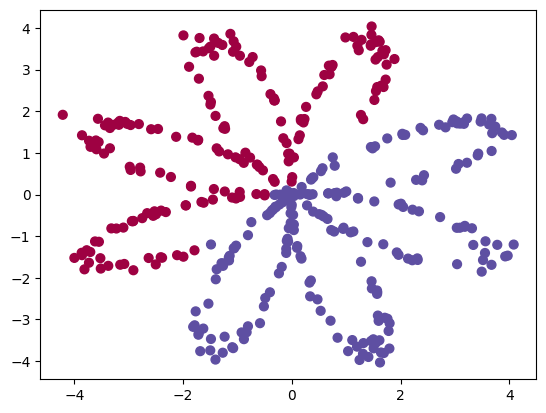

In [ ]:
hidden_state_size = 1;

# Define the 2-layer network here (fill in yout code)

model = {}
model['linear_1'] = nn_Linear(2, hidden_state_size)
model['sigmoid_1'] = nn_Sigmoid()
model['linear_2'] = nn_Linear(hidden_state_size, 1)
model['sigmoid_2'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()


# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):
        # Forward pass (fill in your code)
        xi = X.T[i:i+1, :]
        yi = Y.T[i:i+1, :]
        a0 = model['linear_1'].forward(xi)
        a1 = model['sigmoid_1'].forward(a0)
        c0 = model['linear_2'].forward(a1)
        c1 = model['sigmoid_2'].forward(c0)
        loss += model['loss'].forward(c1, yi)

        # Backward pass (fill in your code)
        dc1 = model['loss'].backward(c1, yi)
        dc0 = model['sigmoid_2'].backward(c0, dc1)
        da1 = model['linear_2'].backward(a1, dc0)
        da0 = model['sigmoid_1'].backward(a0, da1)
        model['linear_1'].backward(xi, da0)

        # Update gradients (fill in your code)
        model['linear_1'].weight = model['linear_1'].weight - learningRate * model['linear_1'].gradWeight
        model['linear_1'].bias = model['linear_1'].bias - learningRate * model['linear_1'].gradBias
        model['linear_2'].weight = model['linear_2'].weight - learningRate * model['linear_2'].gradWeight
        model['linear_2'].bias = model['linear_2'].bias - learningRate * model['linear_2'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):
    # Forward pass (fill in your code)
    xi = X.T[i:i+1, :]
    a0 = model['linear_1'].forward(xi)
    a1 = model['sigmoid_1'].forward(a0)
    c0 = model['linear_2'].forward(a1)
    y_hat = model['sigmoid_2'].forward(c0)

    classEstimate[i,0] = (y_hat > 0.5)

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## Two-layer neural network with 1-hidden layer of size = 5.

Redo the experiment with the hidden layer of size 5 and visualize the result. <b>Describe in a separate cell of the notebook what is different between the two runs </b>. What behaviout did network with largerr hidden state exhibit that the one with smaller one did not? Why?

epoch[0] = 0.09239413
epoch[10] = 0.09783255
epoch[20] = 0.09776902
epoch[30] = 0.09746742
epoch[40] = 0.09664475
epoch[50] = 0.09555079
epoch[60] = 0.09464189
epoch[70] = 0.09371874
epoch[80] = 0.09244050
epoch[90] = 0.09079483
epoch[100] = 0.08910355
epoch[110] = 0.08765830
epoch[120] = 0.08649047
epoch[130] = 0.08538782
epoch[140] = 0.08369496
epoch[150] = 0.07993767
epoch[160] = 0.07373219
epoch[170] = 0.06739078
epoch[180] = 0.06230089
epoch[190] = 0.05848320
epoch[200] = 0.05563761
epoch[210] = 0.05348531
epoch[220] = 0.05182071
epoch[230] = 0.05050185
epoch[240] = 0.04943249
epoch[250] = 0.04854714
epoch[260] = 0.04780064
epoch[270] = 0.04716120
epoch[280] = 0.04660601
epoch[290] = 0.04611832


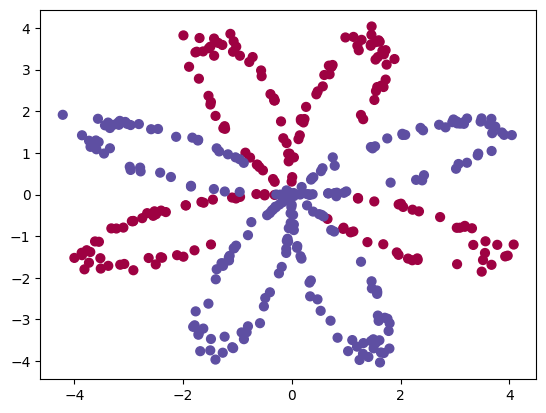

In [ ]:
hidden_state_size = 5;

# Rest should be taken from above

# Define the 2-layer network here (fill in yout code)

model = {}
model['linear_1'] = nn_Linear(2, hidden_state_size)
model['sigmoid_1'] = nn_Sigmoid()
model['linear_2'] = nn_Linear(hidden_state_size, 1)
model['sigmoid_2'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()


# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):
        # Forward pass (fill in your code)
        xi = X.T[i:i+1, :]
        yi = Y.T[i:i+1, :]
        a0 = model['linear_1'].forward(xi)
        a1 = model['sigmoid_1'].forward(a0)
        c0 = model['linear_2'].forward(a1)
        c1 = model['sigmoid_2'].forward(c0)
        loss += model['loss'].forward(c1, yi)

        # Backward pass (fill in your code)
        dc1 = model['loss'].backward(c1, yi)
        dc0 = model['sigmoid_2'].backward(c0, dc1)
        da1 = model['linear_2'].backward(a1, dc0)
        da0 = model['sigmoid_1'].backward(a0, da1)
        model['linear_1'].backward(xi, da0)

        # Update gradients (fill in your code)
        model['linear_1'].weight = model['linear_1'].weight - learningRate * model['linear_1'].gradWeight
        model['linear_1'].bias = model['linear_1'].bias - learningRate * model['linear_1'].gradBias
        model['linear_2'].weight = model['linear_2'].weight - learningRate * model['linear_2'].gradWeight
        model['linear_2'].bias = model['linear_2'].bias - learningRate * model['linear_2'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):
    # Forward pass (fill in your code)
    xi = X.T[i:i+1, :]
    a0 = model['linear_1'].forward(xi)
    a1 = model['sigmoid_1'].forward(a0)
    c0 = model['linear_2'].forward(a1)
    y_hat = model['sigmoid_2'].forward(c0)

    classEstimate[i,0] = (y_hat > 0.5)

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

When the size of the hidden layer is 1, the loss function is smaller and non-linear, with higher accuracy when the size is 5.

# PyTorch and Debugging.

In this section the goal is to experiment with PyTorch and also with the typical debugging techniques used in deep learning and simple debugging tools available to you. In this part, you are given a re-implementation of the dataset and neural network you worked with in the previous section of the assignment. However, this re-implementation is based on the data structures and functions available in PyTorch. Note that both the data loader and the model code contain a few strategically placed **bugs**. Your goal in this part of the assignment is to use the provided strategies to discover those bugs.

## Dataloader

First thing that typically happens in PyTorch code is definition of a dataloader. A dataloader is used to load and organize the data for training, validation and testing. We are providing a slightly buggy implementation below.

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torch.nn as nn
import random

class PlanarDataset(data.Dataset):
    def __init__(self,num_examples=400):
        ## Function to initialize the dataset class
        np.random.seed(1)
        m = 400                  # number of examples
        N = int(m/2)             # number of points per class
        D = 2                    # dimensionality
        a = 4                    # maximum ray of the flower

        self.X = np.zeros((m,D)) # data matrix where each row is a single example
        self.Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)

        for j in range(2):
            ix = range(N*j,N*(j+1))
            t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
            r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
            self.X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            self.Y[ix] = j # Assign j as the label for this range of indices

    def __getitem__(self, index):
        ## Return a data point given an index. Convert numpy array to Pytorch Tensor.
        return torch.from_numpy(self.X[index,:],).type(torch.FloatTensor), torch.from_numpy(self.Y[index,:]).type(torch.FloatTensor)


    def __len__(self):
        ## Return the length of the dataset
        return self.X.shape[0]

    def get_all_data(self):
      ## Return all the data. Not something you would do for large datasets. Just used here for convenience of visualization
      return self.X.T, self.Y.T


## **Debugging Strategy 1**: Always visualize the data.

Please use the code below to visualize the data from the dataloader above. Please run this cell multiple times. You should see that the visualization changes. This means that something non-determenistic is happening in the datalader. You should be able spot what is happening from visualization. Once you do, go back and fix the data loader above.

**Hint:** only one line needs changing in the dataloader.

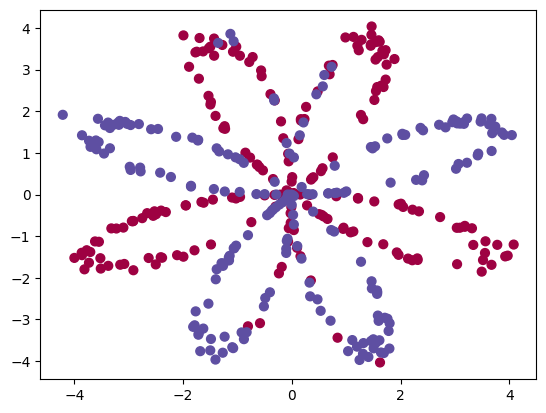

In [ ]:
# Load the data
planarDataObj = PlanarDataset()
X, Y = planarDataObj.get_all_data()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## Model definition and optimization

Functions bellow define a version of neural network with a single hidden layer, from Section "Behaviour of neural networks", using PyTorch functions. Note that similarly to above this code is not bug-free.

epoch[0] = 0.00451421
epoch[10] = 0.00425006
epoch[20] = 0.00419657
epoch[30] = 0.00424566
epoch[40] = 0.00423984
epoch[50] = 0.00417002
epoch[60] = 0.00418709
epoch[70] = 0.00420529
epoch[80] = 0.00428623
epoch[90] = 0.00416800
epoch[100] = 0.00416038
epoch[110] = 0.00418880
epoch[120] = 0.00419084
epoch[130] = 0.00419183
epoch[140] = 0.00416686
epoch[150] = 0.00416332
epoch[160] = 0.00409385
epoch[170] = 0.00417948
epoch[180] = 0.00412747
epoch[190] = 0.00410890
epoch[200] = 0.00414632
epoch[210] = 0.00414146
epoch[220] = 0.00416302
epoch[230] = 0.00414088
epoch[240] = 0.00413727
epoch[250] = 0.00417252
epoch[260] = 0.00413002
epoch[270] = 0.00408518
epoch[280] = 0.00409037
epoch[290] = 0.00407507


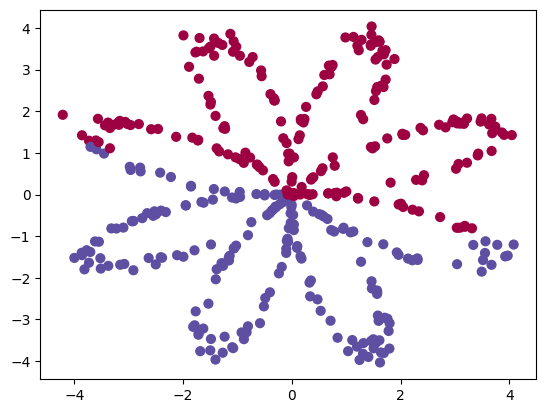

In [ ]:
hidden_state_size = 5;

# Define a model and loss
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():
    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1)
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad()

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]

    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 2:** Remove all sources of randomness from the code

Note that while it is clear that the code above isn't performing as expected (loss does not go down) with every run of the cell you should see a slightly different result and order of loss values. This is because of inherent randomness in the code. While the randomness is good when learning (avoids biases) it is bad when debugging for obvious reasons. Modify the code above to make sure it executes the same way every time you run it. For this you will want to make use of the function below and also fix the randomness in dataloader.

**Note:** Use the function below as well as look at ensuring that the order of data in the dataloader remains fixed. You may want to consult PyTorch guidelines on reproducibility https://pytorch.org/docs/stable/notes/randomness.html.

epoch[0] = 0.00444656
epoch[10] = 0.00426588
epoch[20] = 0.00430644
epoch[30] = 0.00421921
epoch[40] = 0.00427635
epoch[50] = 0.00425086
epoch[60] = 0.00427511
epoch[70] = 0.00431843
epoch[80] = 0.00420636
epoch[90] = 0.00418167
epoch[100] = 0.00420170
epoch[110] = 0.00425678
epoch[120] = 0.00426154
epoch[130] = 0.00426261
epoch[140] = 0.00417294
epoch[150] = 0.00433422
epoch[160] = 0.00423602
epoch[170] = 0.00422455
epoch[180] = 0.00419261
epoch[190] = 0.00426382
epoch[200] = 0.00425630
epoch[210] = 0.00413152
epoch[220] = 0.00422918
epoch[230] = 0.00420370
epoch[240] = 0.00423237
epoch[250] = 0.00422778
epoch[260] = 0.00418729
epoch[270] = 0.00413515
epoch[280] = 0.00425963
epoch[290] = 0.00417366


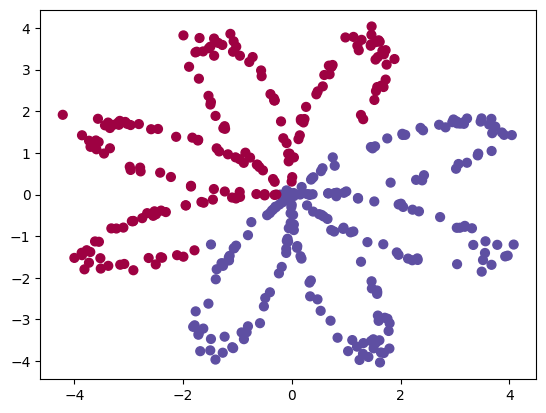

In [ ]:
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)
# Call the function to fix the seeds
fix_seeds()

# Copy the code from Section Model definition and optimization and modify accordingly
hidden_state_size = 5;

# Define a model and loss
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():
    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1)
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
fix_seeds()  # Apply the seed to the dataloader
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad()

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]

    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 3:** Train with minimal amount of data

It may still be difficult to identify what is wrong based on results in Section "Remove all sources of randomness from the code". A really good strategy, especially for model debugging, is to try optimizing with a single example/sample. Modify the code from Section "Remove all sources of randomness from the code" in order to do this. Once you do and run it, it should be obvious that there is a bug in your code and what that bug might be.

epoch[0] = 0.06481759
epoch[10] = 0.18984169
epoch[20] = 0.39719525
epoch[30] = 0.38355736
epoch[40] = 0.39203108
epoch[50] = 0.39918972
epoch[60] = 0.38987378
epoch[70] = 0.37429002
epoch[80] = 0.37305465
epoch[90] = 0.37257261
epoch[100] = 0.37217372
epoch[110] = 0.37180122
epoch[120] = 0.37144419
epoch[130] = 0.37110218
epoch[140] = 0.37077835
epoch[150] = 0.37047685
epoch[160] = 0.37020187
epoch[170] = 0.36995759
epoch[180] = 0.36974812
epoch[190] = 0.36957762
epoch[200] = 0.36945086
epoch[210] = 0.36937334
epoch[220] = 0.36935196
epoch[230] = 0.36939509
epoch[240] = 0.36951161
epoch[250] = 0.36971024
epoch[260] = 0.36999370
epoch[270] = 0.37034999
epoch[280] = 0.37074006
epoch[290] = 0.37110225


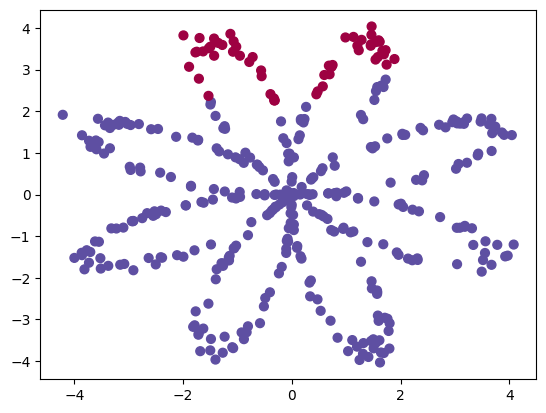

In [ ]:
# Copy the code from Section "Remove all sources of randomness from the code" and modify to run with batch size of 1 and only one / same batch used in each epoch.
hidden_state_size = 5;

def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

# Define a model and loss
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():
    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1)
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 1

# Setup the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad()

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]

    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

epoch[0] = 0.25200692
epoch[10] = 0.24988558
epoch[20] = 0.24557758
epoch[30] = 0.24325990
epoch[40] = 0.24103444
epoch[50] = 0.23819194
epoch[60] = 0.23480089
epoch[70] = 0.23139022
epoch[80] = 0.22839305
epoch[90] = 0.22591517
epoch[100] = 0.22379933
epoch[110] = 0.22166313
epoch[120] = 0.21876418
epoch[130] = 0.21380508
epoch[140] = 0.20552514
epoch[150] = 0.19449252
epoch[160] = 0.18286128
epoch[170] = 0.17220984
epoch[180] = 0.16308955
epoch[190] = 0.15550820
epoch[200] = 0.14927091
epoch[210] = 0.14413609
epoch[220] = 0.13988182
epoch[230] = 0.13632420
epoch[240] = 0.13331818
epoch[250] = 0.13075106
epoch[260] = 0.12853609
epoch[270] = 0.12660609
epoch[280] = 0.12490935
epoch[290] = 0.12340505


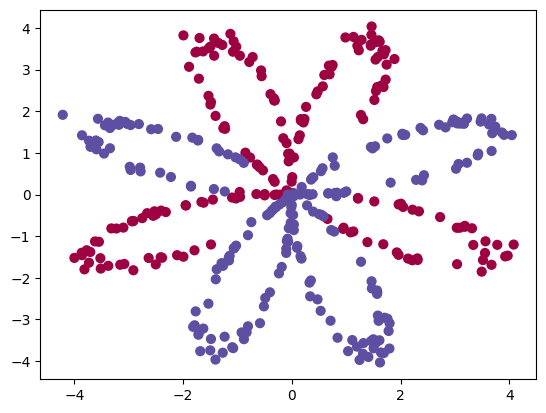

In [111]:
# Once you find the bug, fix it here and make sure you can effectively reproduce the result in Section "Behaviour of neural networks"

# Copy the code from Section "Remove all sources of randomness from the code" and modify to run with batch size of 1 and only one / same batch used in each epoch.

def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

# Fix random seeds
fix_seeds()

# Copy the code from Section Model definition and optimization and modify accordingly

hidden_state_size = 5;

# Define a model and loss
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
#for param in linear1.parameters():
    #param.requires_grad = False      #将线性层的参数设置为不可训练，即不会在反向传播中更新
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1)
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.0007
num_epochs = 300
batchsize = 1

# Setup the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration。
        optimizer.zero_grad()

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]

    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 4:** Use Tensorboard or similar.

At this point the model and training code should be correct and you should be able to train the model. However, the hyperparameters may still not be optimal. For hyperparameter tuning and to log many experiments it is advisable to use some way to visualise the training process. Tensorboard provides such ability. Another alternative is Weights & Biases.  

Let’s now try using TensorBoard with PyTorch! Before logging anything, we need to create a SummaryWriter instance. Writer will output to ./runs/ directory by default.

In [ ]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

We can use `add_scalar(tag, scalar_value, global_step=None, walltime=None)` to log scalar values (e.g. loss). We have to call `flush()` method to make sure that all pending events have been written to disk. Finally if we do not need the summary writer anymore, then call `close()` method.

Your next task is to slightly modify the code to log the Loss and Accuracy into the Tesnorboard log file. This will require modifying the training loop as follows:

```
for epoch in range(num_epochs):
    running_loss = 0.0
    total_correct = 0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad()

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        total_correct += output.argmax(dim=1).eq(target).sum().item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
    
    # Log accuracy and loss
    writer.add_scalar("Loss/train", running_loss, epoch)
    writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)
        
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

# Flush and close the log file
writer.flush()
writer.close()
```




In [ ]:
# Insert your code here
learning_rate = 0.1
num_epochs = 300


# Setup the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)


for epoch in range(num_epochs):
    running_loss = 0.0
    total_correct = 0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad()

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        total_correct += output.argmax(dim=1).eq(target).sum().item()

        # Backpropagation
        loss.backward()
        optimizer.step()

    # Log accuracy and loss
    writer.add_scalar("Loss/train", running_loss, epoch)
    writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

# Flush and close the log file
writer.flush()
writer.close()

Now install the tensorboard

In [ ]:
!pip install tensorboard

Now to start tensorboard in google colab we can run following command.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs